## **Importing libraries required**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **Data Load to Dataframe**

In [39]:
#data set taken from kaggle and reading it
df1=pd.read_csv('/content/bengaluru_house_prices.csv')
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [40]:
df1.shape

(13320, 9)

In [41]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [42]:
df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

## **Drop few columns**

In [43]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

# **Checking for null values**

In [44]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [45]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# **Feature Engineering**

In [46]:
df3['bhk']=df3['size'].str.split(' ').str[0]#redefining size column

df3['bhk']=df3['bhk'].astype(int)
df3['bhk'].unique()

<ipython-input-46-f2a18fb8a9c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].str.split(' ').str[0]#redefining size column
<ipython-input-46-f2a18fb8a9c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['bhk'].astype(int)


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

**Covert all the values in total sq ft column to float**

In [47]:
def convert_to_num(value):
    if isinstance(value, float):
        return value
    elif isinstance(value, int):
        return float(value)
    elif isinstance(value, str):
        if '-' in value:
            start, end = map(float, value.split('-'))
            return (start + end) / 2
        else:
            try:
                return float(value)
            except ValueError:
                return None
    else:
        return None


df3['total_sqft'] = df3['total_sqft'].apply(convert_to_num)


<ipython-input-47-69321cd41488>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(convert_to_num)


In [48]:
df3['total_sqft'].dtypes

dtype('float64')

In [49]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Since there are so many location, we will try to reduce them by tagging them as 'others' wherever there are less than 10 data points

In [50]:
location_stats = df4['location'].value_counts(ascending=False)
location_stats.astype(float)

location
Whitefield           534.0
Sarjapur  Road       392.0
Electronic City      302.0
Kanakpura Road       266.0
Thanisandra          233.0
                     ...  
Vidyapeeta             1.0
Maruthi Extension      1.0
Okalipura              1.0
Old Town               1.0
Abshot Layout          1.0
Name: count, Length: 1304, dtype: float64

In [51]:
location_stas_less_than_10 = location_stats[location_stats < 10]
location_stas_less_than_10

location
Chennammana Kere           9
Vishwanatha Nagenahalli    9
Jakkur Plantation          9
2nd Phase JP Nagar         9
B Narayanapura             9
                          ..
Vidyapeeta                 1
Maruthi Extension          1
Okalipura                  1
Old Town                   1
Abshot Layout              1
Name: count, Length: 1051, dtype: int64

In [52]:
df4.location = df4.location.apply(lambda x : 'other' if x in location_stas_less_than_10 else x)

Considering 300 sqft for one bhk we shall remove outliers which are unusual

In [53]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [54]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

<Axes: title={'center': 'Boxplot for Numerical Variable'}>

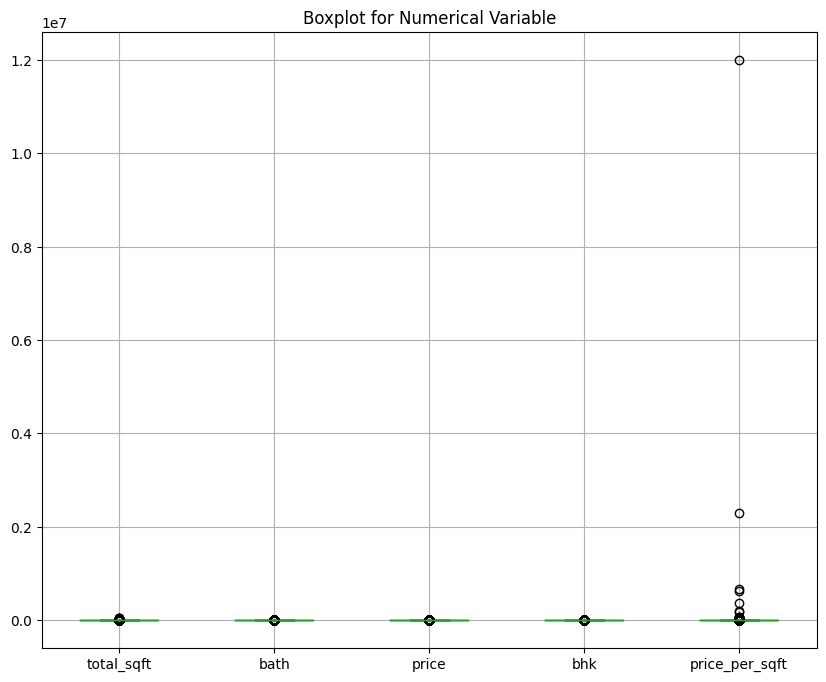

In [55]:
# Boxplot for outlier analysis
plt.figure(figsize=(10,8))
plt.title('Boxplot for Numerical Variable')
df4.boxplot()

# **Removing outliers using std and mean method**

In [56]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [57]:
df6 = remove_pps_outliers(df5)
df6.shape

(10226, 7)

Considering 1 bathroom for 1 bhk in common assumption or max of two extra bathrooms we will remove data having bathrooms (BHK+2)

In [58]:
df7 = df6[df6.bath < df6.bhk+2]
df7.shape

(10132, 7)

In [59]:
df7 = df7.drop(['size','price_per_sqft'],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


In [60]:
df7.location.value_counts()

location
other               2205
Whitefield           475
Sarjapur  Road       289
Electronic City      277
Kanakpura Road       189
                    ... 
Nagasandra             4
Dairy Circle           4
Thyagaraja Nagar       4
Marsur                 3
BTM 1st Stage          2
Name: count, Length: 254, dtype: int64

In [61]:
df8=df7.copy()

# **Dummy Encoding of Categorical Variables**

In [62]:
dummies = pd.get_dummies(df8.location)

dummies = dummies.astype(int)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,other,1353.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,other,812.0,1.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,other,1440.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10224,other,1075.0,2.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df10 = df9.drop('location',axis = 'columns')
df10.head(10)
df9.to_csv('my_data.csv', index=False)

In [66]:
locations = df9['location'].unique().tolist()
locations

[' Devarachikkanahalli',
 '1st Block Jayanagar',
 '1st Block Koramangala',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 1st Stage',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basapura',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanaha

# **Model Training**

In [67]:
X = df10.drop(['price'],axis='columns')
y=df10.price

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8509186899788318

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict y values using the trained model
y_pred = model.predict(X)

# Calculate performance metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
# Print summary
print("Linear Regression Model Summary:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Linear Regression Model Summary:
Mean Absolute Error (MAE): 18.70768225399976
Mean Squared Error (MSE): 1259.0616537601802
Root Mean Squared Error (RMSE): 35.48325878157445
R-squared: 0.8208839969967021


# **Prediction model**

In [77]:

def predict_price(location, sqft, bath, bhk, model, X):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]


location = input("Enter location: ")
total_sqft = float(input("Enter total square feet: "))
bath = int(input("Enter number of bathrooms: "))
bhk = int(input("Enter number of bedrooms (BHK): "))

predicted_price = predict_price(location, total_sqft, bath, bhk, model, X)
print("Predicted Price in Lakh Rupees:", predicted_price)

Enter location: Kothanur
Enter total square feet: 1000
Enter number of bathrooms: 2
Enter number of bedrooms (BHK): 2
Predicted Price in Lakh Rupees: 41.07974197001832


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
